In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') ## Exclui as variaveis do ambiente

import yfinance as yf
yf.pdr_override()

import pyfolio as pf

from sklearn.cluster import KMeans

import tkinter as tk 
from tkinter import *
from tkinter import messagebox as mb
from tkinter import ttk 
from tkinter.messagebox import showinfo

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,NavigationToolbar2Tk) 

import string
import warnings
warnings.filterwarnings('ignore')
import requests
import datetime as dt
import time

C:\Users\ribei\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


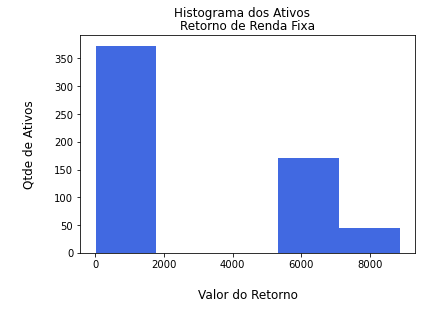

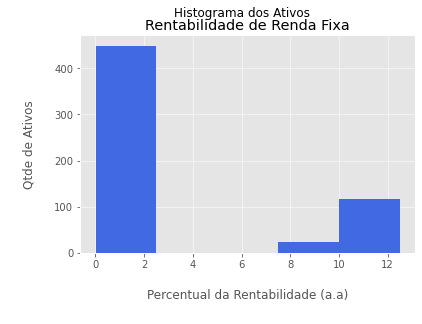

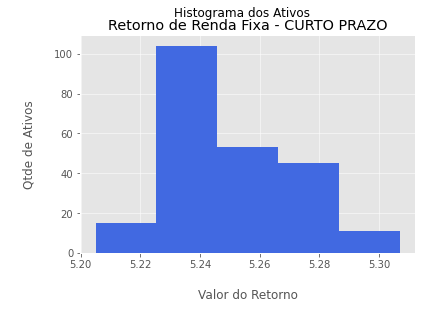

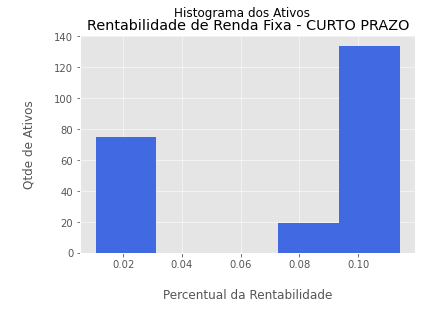

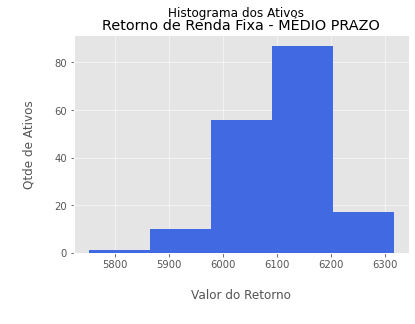

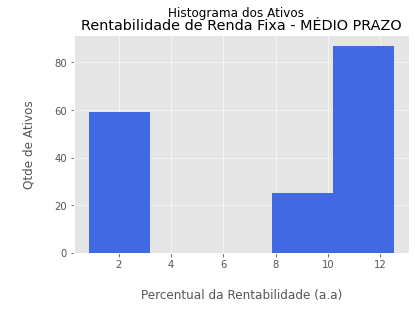

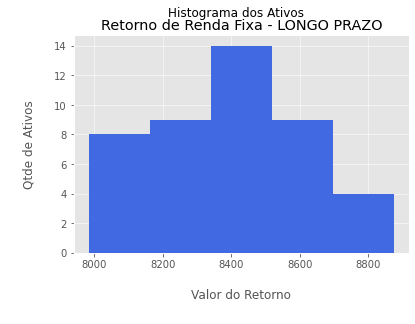

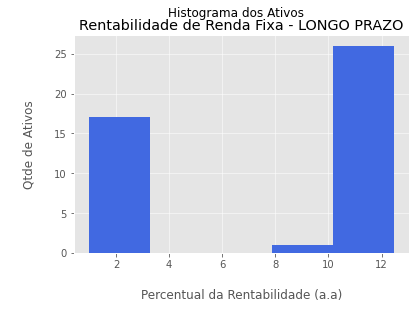

OS TICKERS:  SYNE3.SA GOAU4.SA TASA4.SA GGBR4.SA UNIP3.SA UNIP6.SA 
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  7 of 7 completed


Start date,2020-11-03
End date,2022-10-31
Total months,23
,Backtest
Annual return,55.289%
Cumulative returns,137.386%
Annual volatility,26.518%
Sharpe ratio,1.80
Calmar ratio,2.74
Stability,0.58
Max drawdown,-20.197%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.20,2022-05-04,2022-07-15,NaT,NaN
1,20.12,2021-06-04,2021-09-21,2021-12-15,139
2,10.23,2021-12-30,2022-02-21,2022-03-17,56
3,7.40,2021-01-14,2021-01-27,2021-02-17,25
4,7.09,2022-03-24,2022-04-11,2022-05-04,30


Stress Events,mean,min,max
New Normal,0.19%,-6.14%,5.65%


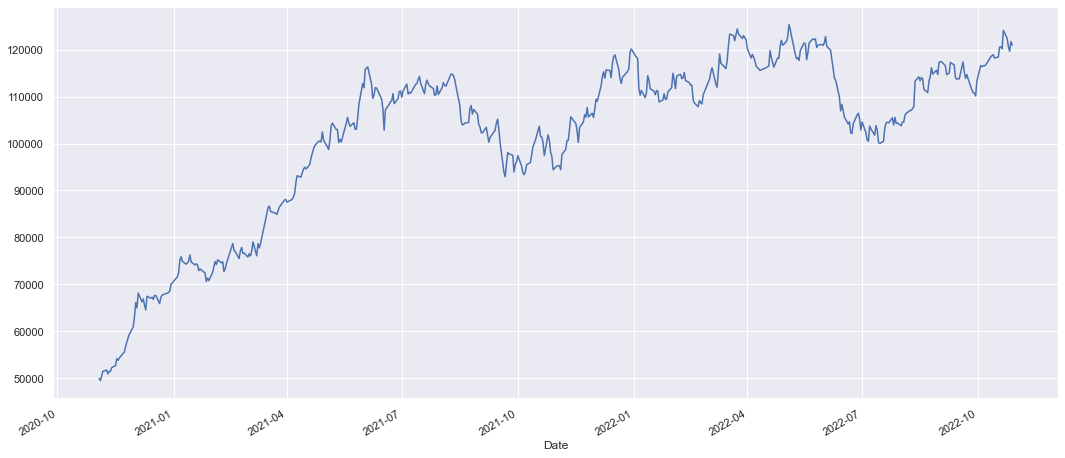

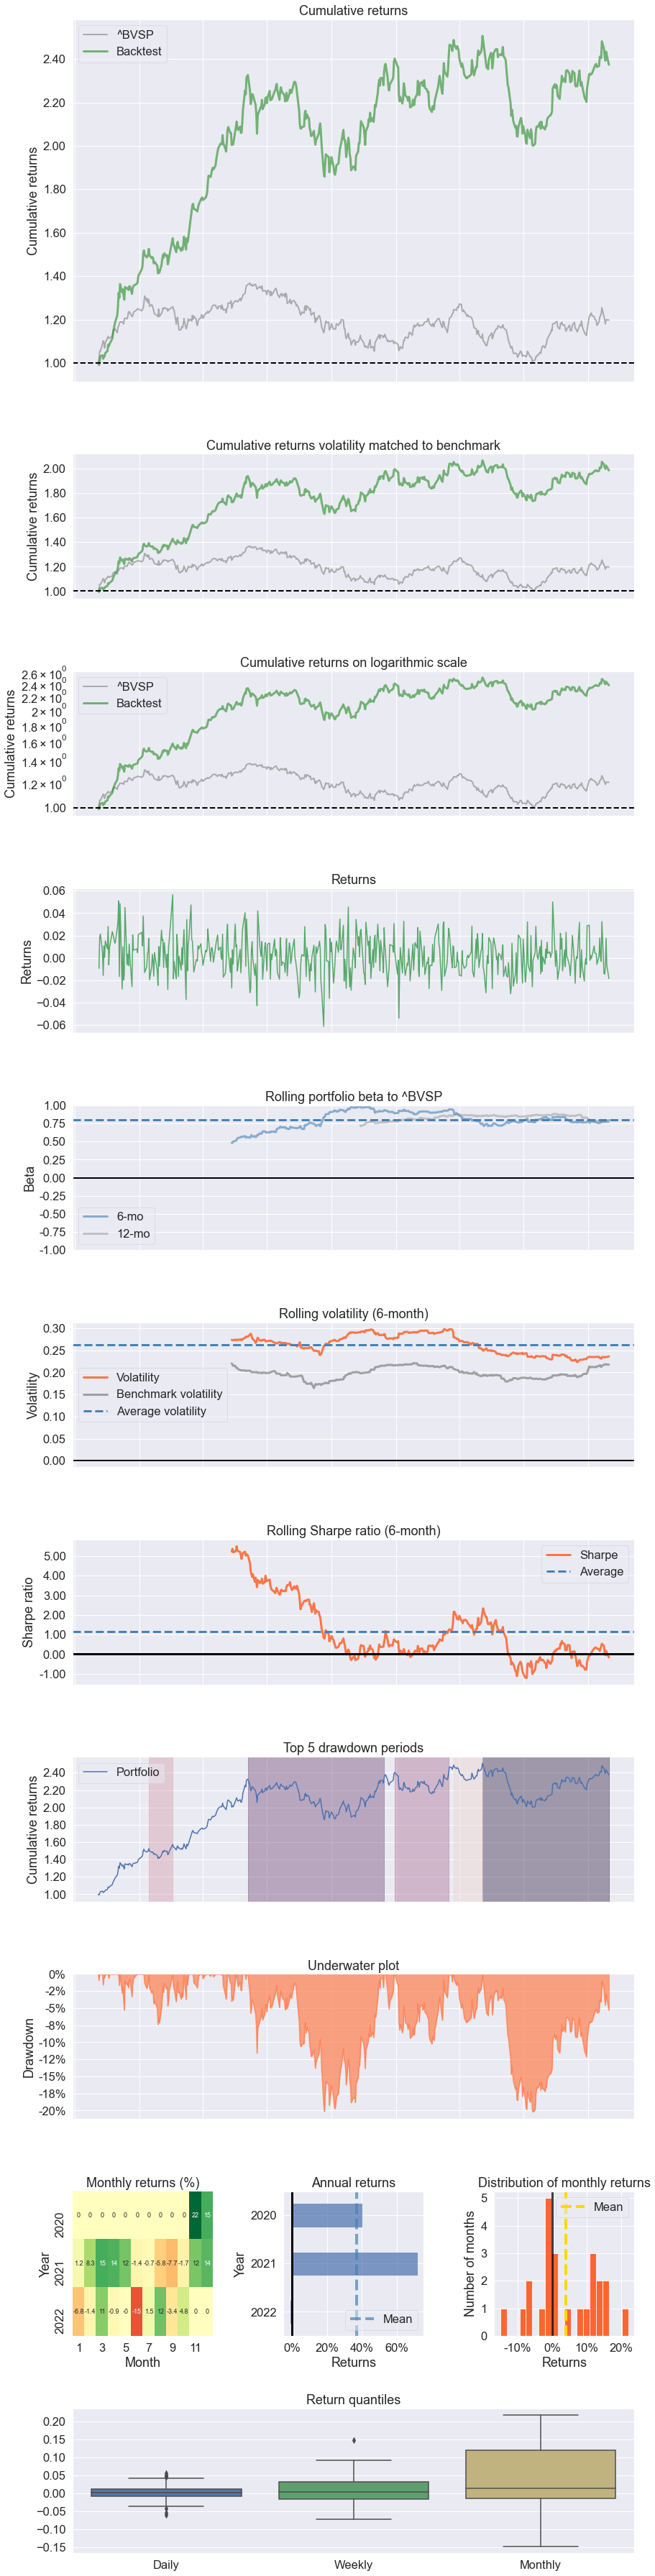

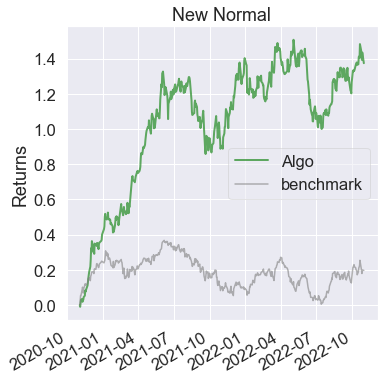

In [2]:
def questionar(nPergunta, pergunta, alternativas):
    GRP_PERGUNTA[nPergunta] = tk.StringVar()
    exibeLabel(pergunta, 'ARIAL', 10, 5, 5, 'x')
    
    for perg in alternativas:        
        resp_Perg1 = ttk.Radiobutton (janelaForm, text = perg[0], value = perg[1], variable = GRP_PERGUNTA[nPergunta])
        resp_Perg1.pack(fill='x', padx=5, pady=5)

def confirmaPerfil():
    global nomeInvestidor, tipoInvestidor
    
    tipoInvestidor = ""
    confResposta = mb.askquestion('Confirmacao ',  'Confirma as alternativas escolhidas? ')       
    if confResposta == 'yes' : 
        nomeInvestidor = txtNome.get()                
        qtdA, qtdB, qtdC = 0,0,0
        aux = qtdPergunta - 1
        textoErro = ""
        if nomeInvestidor == "":
            textoErro = "Informe o seu nome.\n"
            
        for i in range(0, qtdPergunta):
            if GRP_PERGUNTA[i].get() == "A": qtdA = qtdA + 1
            if GRP_PERGUNTA[i].get() == "B": qtdB = qtdB + 1
            if GRP_PERGUNTA[i].get() == "C": qtdC = qtdC + 1
            if GRP_PERGUNTA[i].get() == "": 
                textoErro = textoErro + "Informe todas as alternativas"
                break

        if textoErro == "":
            janelaForm.destroy()
            if (qtdA >  qtdB and qtdA >  qtdC): tipoInvestidor = "CONSERVADOR"
            if (qtdB >= qtdA and qtdB >  qtdC): tipoInvestidor = "MODERADO"
            if (qtdC >= qtdA and qtdC >= qtdB): tipoInvestidor = "ARROJADO"

            criteriosInvestimento()
        else:
            mb.showerror('Erro de preenchimento ',  textoErro)
            
def criteriosInvestimento():        
    global nomeInvestidor, tipoInvestidor
    
    janelaForm = montaFormulario('Criterios basicos para o investimento', '1300x750', 'full')
    
    GRP_RESP_PERIODO = tk.StringVar()
    texto = "Ola " + nomeInvestidor + ", sinta-se bem em nosso aplicativo"
    exibeLabel(texto, 'ARIAL', 15, 5, 5, 'x')
    
    texto = "Seu perfil de investidor foi classificado como " + tipoInvestidor
    exibeLabel(texto, 'ARIAL', 15, 5, 5, 'x')
    
    texto = "Por favor, informe os dados abaixo para que possamos lhe sugerir uma carteira vencedora"
    exibeLabel(texto, 'ARIAL', 15, 5, 5, 'x')
    
    def confirmaCriterio():
        global aport, periodo
        confResposta = mb.askquestion("Confirmacao ",  "Confirma os critérios? ")        
        if confResposta == 'yes' : 
            aport = txtAport.get()
            periodo = GRP_RESP_PERIODO.get()
            if aport == "" or periodo == "":
                mb.showerror('Erro de preenchimento ',  'Informe o valor e o período para o investimento ') 
            else:
                janelaForm.destroy()
                buscaAtivos()
    #------------------------------------------------------------------------------------------
    exibeLabel("Informe o valor que pretende investir: ", 'Arial', 12, 5, 5, 'x')
    txtAport = ttk.Entry(janelaForm, font = ('courier', 12, 'bold'))
    txtAport.pack(fill = 'x', padx = 5, pady = 5)

    exibeLabel("Informe o período para o investimento: ", 'Arial', 12, 5, 5, 'x')
    resp_Periodo = ttk.Radiobutton (janelaForm, text = "Curto Prazo (6 meses)", value = "C", variable = GRP_RESP_PERIODO)
    resp_Periodo.pack(fill='x', padx=5, pady=5)
    resp_Periodo = ttk.Radiobutton (janelaForm, text = "Médio Prazo (2 anos)",  value = "M", variable = GRP_RESP_PERIODO)
    resp_Periodo.pack(fill='x', padx=5, pady=5)
    resp_Periodo = ttk.Radiobutton (janelaForm, text = "Longo Prazo (5 anos)",  value = "L", variable = GRP_RESP_PERIODO)
    resp_Periodo.pack(fill='x', padx=5, pady=5)
    #------------------------------------------------------------------------------------------    
    btnConfirma = ttk.Button(
                             janelaForm,
                             text    = "Confirmar",
                             command = confirmaCriterio
    )
    btnConfirma.pack(fill='y', padx=5, pady=5)
    
    janelaForm.mainloop()

def buscaAtivos():
    global nomeInvestidor, tipoInvestidor, aport, periodo, dfRendaFixa
    
    if tipoInvestidor == "CONSERVADOR" or tipoInvestidor == "MODERADO":
        import csv
        dfRendaFixa = pd.read_csv('./rendaFixa2.csv', sep=';')
        analiseExploratoriaRF()
        buscaAtivosRendaFixa()
    
    if tipoInvestidor == "ARROJADO":
        buscaAtivosRendaVariavel(aport, periodo, 0, '')
    
def  buscaAtivosRendaFixa():
    global nomeInvestidor, tipoInvestidor, aport, periodo, dfRendaFixa
    if periodo == "C": dfRendaFixa = dfRendaFixa[dfRendaFixa['meses'] == 6]
    if periodo == "M": dfRendaFixa = dfRendaFixa[dfRendaFixa['meses'] == 24]
    if periodo == "L": dfRendaFixa = dfRendaFixa[dfRendaFixa['meses'] == 60]
    
    dfRendaFixa['rentabilidade'].astype(float)
    
    rentabilMinima = 1000     ## 1%
    if tipoInvestidor == "MODERADO":
        rentabilMinima = 5000 ## 5%
    
    dfRendaFixa = dfRendaFixa[dfRendaFixa['rentabilidade'] >= rentabilMinima]
    
    qtdElementos = dfRendaFixa[dfRendaFixa.columns[0]].count()
    qtdRKN = qtdElementos - 1
   
    rankingRF = pd.DataFrame()
    rankingRF['pos'] = range(1,qtdElementos)
    
    rankingRF['emissor']       = dfRendaFixa[dfRendaFixa['rentabilidade'] > rentabilMinima].sort_values(by=['rentabilidade'])['emissor'][:qtdRKN].values
    rankingRF['rentabilidade'] = dfRendaFixa[dfRendaFixa['rentabilidade'] > rentabilMinima].sort_values(by=['rentabilidade'])['rentabilidade'][:qtdRKN].values
    rankingRF['tipo']          = dfRendaFixa[dfRendaFixa['rentabilidade'] > rentabilMinima].sort_values(by=['rentabilidade'])['tipo'][:qtdRKN].values
    rankingRF['prazo']         = dfRendaFixa[dfRendaFixa['rentabilidade'] > rentabilMinima].sort_values(by=['rentabilidade'])['prazo'][:qtdRKN].values
    
    qtdSugestaoRF = 10
    if qtdRKN < qtdSugestaoRF: qtdSugestaoRF = qtdRKN
        
    sugestaoCartRFCDB = pd.DataFrame()
    sugestaoCartRFCDB = rankingRF[rankingRF['tipo'] == 'CDB']
    
    sugestaoCartRFLCA = pd.DataFrame()
    sugestaoCartRFLCA = rankingRF[rankingRF['tipo'] == 'LCA']
    
    sugestaoCartRFTED = pd.DataFrame()
    sugestaoCartRFTED = rankingRF[rankingRF['tipo'] == 'Tesouro Direto']
    
    sugestaoCarteiraRF = pd.DataFrame()
 
    if len(sugestaoCartRFCDB) > 0: sugestaoCarteiraRF = sugestaoCarteiraRF.append(sugestaoCartRFCDB[:5])
    if len(sugestaoCartRFLCA) > 0: sugestaoCarteiraRF = sugestaoCarteiraRF.append(sugestaoCartRFLCA[:5])
    if len(sugestaoCartRFTED) > 0: sugestaoCarteiraRF = sugestaoCarteiraRF.append(sugestaoCartRFTED[:5])
        
    sugestaoCarteiraRF.reset_index(inplace=True, drop=True)
    
    if tipoInvestidor == "MODERADO":
        buscaAtivosRendaVariavel(aport, periodo, qtdSugestaoRF, sugestaoCarteiraRF)
    else:
        sugestaoCartRendaVar = pd.DataFrame()
        qtdSugestaoRV = 0
        sugestoesDeAtivos(sugestaoCartRendaVar, sugestaoCarteiraRF)
    
def buscaAtivosRendaVariavel(aport, periodo, qtdSugestaoRF, sugestaoCarteiraRF):
    global diasMediaMovel, dfRendaVariavel
    pisoLiquidez    = 1000000
    dividendoMinimo = 0.1
    dividaBruta     = 10
    
    if periodo == "L": 
        dividendoMinimo = 0.15
        dividaBruta     = 2
        diasMediaMovel = 200
    
    if tipoInvestidor == "ARROJADO": pisoLiquidez = 3000000
    
    janelaForm = montaFormulario('Busca de Ativos de Renda Variavel', '1300x750', 'full')
    
    exibeLabel("Buscando Ativos de Renda Variavel. Aguarde ...", 'Arial', 15, 5, 5, 'x')
    
    exibeLabel("Analisando Fundamentos dos Ativos em: www.fundamentus.com.br", 'Arial', 15, 5, 5, 'x')
    url = 'http://www.fundamentus.com.br/resultado.php'
    
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}
    r = requests.get(url, headers=header)
    
    df = pd.read_html(r.text,  decimal=',', thousands='.')[0]
    df = df.replace(r'\n',' ', regex=True) 
    
    for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
        df[coluna] = df[coluna].str.replace('.', '')
        df[coluna] = df[coluna].str.replace(',', '.')
        # [str.rstrip] vai retirar o simbolo da [%] da String
        df[coluna] = df[coluna].str.rstrip('%')
        df[coluna] = df[coluna].astype(float, errors = 'raise') / 100 
    
    analiseExploratoriaRV(df)
    
    dfAux1 = df[df['Liq.2meses'] > pisoLiquidez]
    dfAux2 = dfAux1[df['Div.Yield'] > dividendoMinimo]
    dfAux3 = dfAux2[df['Dív.Brut/ Patrim.'] <= dividaBruta]
    
    df = dfAux3
    
    qtdElementos = df[df.columns[0]].count()
    aux = len(df[ df['EV/EBIT'] > 0 ])
    if qtdElementos > aux: qtdElementos = aux
    qtdRKN = qtdElementos - 1
    
    ranking = pd.DataFrame()
    ranking['pos'] = range(1,qtdElementos) ## Gera coluna numerada de 1 a qtdElementos do ranking
    
    ranking['EV/EBIT'] = df[ df['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:qtdRKN].values
    ranking['ROIC']    = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:qtdRKN].values

    a = ranking.pivot_table(columns='EV/EBIT', values='pos')
    b = ranking.pivot_table(columns='ROIC', values='pos')
    t = pd.concat([a,b])
    rank = t.dropna(axis=1).sum()
    
    qtdSugestaoRV = 6
    if qtdRKN < 6: qtdSugestaoRV = qtdRKN
      
    rank = rank.sort_values()[:qtdSugestaoRV].to_frame()
    rank = rank.reset_index()
    rank.rename(columns={'index': 'papel'}, inplace = True)
    
    sugestaoCartRendaVar = pd.DataFrame()
    for i in rank['papel']:
        sugestaoCartRendaVar = sugestaoCartRendaVar.append(df[df['Papel'] == i]) 
    
    sugestaoCartRendaVar = sugestaoCartRendaVar.reset_index()
    janelaForm.destroy()
    
    if tipoInvestidor == "ARROJADO":qtdSugestaoRF = 0

    sugestoesDeAtivos(sugestaoCartRendaVar, sugestaoCarteiraRF)

def sugestoesDeAtivos(sugestaoCartRendaVar, sugestaoCarteiraRF):
    global nomeInvestidor, tipoInvestidor
    qtdSugestaoRF = len(sugestaoCarteiraRF)
    qtdSugestaoRV = len(sugestaoCartRendaVar)
    
    janelaForm = montaFormulario('Sugestoes de Investimentos', '1300x750', 'full')
    
    texto = nomeInvestidor + ", seu perfil de investidor é " + tipoInvestidor
    exibeLabel(texto, 'ARIAL', 14, 5, 5, 'x')
    
    if tipoInvestidor == "CONSERVADOR":
        texto = "Selecionamos para você uma cesta de ativos de Renda Fixa.\nEscolha os desejados e clique em confirmar."
    
    if tipoInvestidor == "ARROJADO":
        texto = "Selecionamos para você uma cesta de ativos de Renda Variável.\nEscolha os desejados e clique em confirmar."
    
    if tipoInvestidor == "MODERADO":
        texto = "Selecionamos para você uma cesta com um MIX de ativos de Renda Fixa e Variável.\nEscolha os desejados e clique em confirmar."
    
    exibeLabel(texto, 'ARIAL', 10, 5, 5, 'x')
    
    valX    = 10
    valY    = 85
    btChk   = []
    varResp = []
    aux     = pd.DataFrame()
    if qtdSugestaoRV > 0:
        texto = "Opções de investimentos em Renda Variável"
        lblTexto = ttk.Label(text = texto, font=('Arial-Black', 12))
        lblTexto.place(x = 10, y = valY)
        valY = valY + 35
        for i in range(qtdSugestaoRV):
            varResp.append(tk.IntVar())
            opcao = sugestaoCartRendaVar['Papel'][i]
            btChk.append(tk.Checkbutton(janelaForm, 
                                      text = opcao,                                  
                                      variable = varResp[i], 
                                      onvalue = 1, 
                                      offvalue = 0)
                           )
            btChk[i].place(x = valX, y = valY)
          
            aux = sugestaoCartRendaVar[['Cotação']].where(sugestaoCartRendaVar['Papel'] == opcao).dropna()
            aux.reset_index(drop=True, inplace=True)
            aux = aux.values.tolist()
            
            lblAux = tk.Label(janelaForm, text = "Cotação: " + str(aux[0]))
            lblAux.place(x = valX + 20, y = valY + 25)

            aux = sugestaoCartRendaVar[['EV/EBITDA']].where(sugestaoCartRendaVar['Papel'] == opcao).dropna()
            aux.reset_index(drop=True, inplace=True)
            aux = aux.values.tolist()
            lblAux = tk.Label(janelaForm, text = "EV/EBITDA: " + str(aux[0]))
            lblAux.place(x = valX + 20, y = valY + 50)
            
            aux = sugestaoCartRendaVar[['ROIC']].where(sugestaoCartRendaVar['Papel'] == opcao).dropna()
            aux.reset_index(drop=True, inplace=True)
            aux = aux.values.tolist()
            lblAux = tk.Label(janelaForm, text = "ROIC: " + str(aux[0]))
            lblAux.place(x = valX + 20, y = valY + 75)

            aux = sugestaoCartRendaVar[['Patrim. Líq']].where(sugestaoCartRendaVar['Papel'] == opcao).dropna()
            aux.reset_index(drop=True, inplace=True)
            aux = aux.values.tolist()
            lblAux = tk.Label(janelaForm, text = "Patrim. Líq: " + str(aux[0]))
            lblAux.place(x = valX + 20, y = valY + 100)

            aux = sugestaoCartRendaVar[['Div.Yield']].where(sugestaoCartRendaVar['Papel'] == opcao).dropna()
            aux.reset_index(drop=True, inplace=True)
            aux = aux.values.tolist()
            lblAux = tk.Label(janelaForm, text = "Div.Yield: " + str(aux[0]))
            lblAux.place(x = valX + 20, y = valY + 125)

            valX = valX + 250
            
        valY = valY + 125 + 25
        btnConfirma = tk.Button(janelaForm,text="Comparar com IBOVESPA",command=analiseSugestao(sugestaoCartRendaVar['Papel']))
        #btnConfirma.place(x = 300, y = valY + 20)
    
    saltoDeLinha = valY
    valX = 10
    if qtdSugestaoRF > 0:
        btChkRF   = []
        varRespRF = []
        texto = "Opções de investimentos em Renda Fixa"
        lblTexto = ttk.Label(text = texto, font=('Arial-Black', 12))
        lblTexto.place(x = 10, y = saltoDeLinha)
        
        for i in range(qtdSugestaoRF):
            if i > 0 and i % 5 == 0:
                valX = 10
                saltoDeLinha = saltoDeLinha + 90
                temp = 1

            varRespRF.append(tk.IntVar())
            emissor       = sugestaoCarteiraRF['emissor'][i]
            rentabilidade = sugestaoCarteiraRF['rentabilidade'][i]
            tipo          = sugestaoCarteiraRF['tipo'][i]
            prazo         = sugestaoCarteiraRF['prazo'][i]
            opcao = tipo + " - " + emissor
            btChkRF.append(tk.Checkbutton(janelaForm, 
                                      text = opcao,                                  
                                      variable = varRespRF[i], 
                                      onvalue = 1, 
                                      offvalue = 0)
                           )
            btChkRF[i].place(x = valX, y = saltoDeLinha + 35)
            
            lblAux = tk.Label(janelaForm, text = "Rentabilidade: " + str(rentabilidade))
            lblAux.place(x = valX + 20, y = saltoDeLinha + 60)
            lblAux = tk.Label(janelaForm, text = "Prazo: " + str(prazo))
            lblAux.place(x = valX + 20, y = saltoDeLinha + 90)
            valX = valX + 250
            
    def confirmaEscolhaCarteira():
        global carteiraRV, carteiraRF
        qtdEscolha = 0
        if qtdSugestaoRV > 0:
            for i in range(qtdSugestaoRV):
                if varResp[i].get() == 1:
                    qtdEscolha = qtdEscolha + 1
                    carteiraRV.append(sugestaoCartRendaVar['Papel'][i])
        
        if qtdSugestaoRF > 0:
            for i in range(qtdSugestaoRF):
                if varRespRF[i].get() == 1:
                    qtdEscolha = qtdEscolha + 1
                    aux1 = sugestaoCarteiraRF['tipo'][i] + " - " + str(sugestaoCarteiraRF['emissor'][i]) + ": " + str(sugestaoCarteiraRF['rentabilidade'][i]) 
                    carteiraRF.append(aux1)
        
        if qtdEscolha > 0:
            janelaForm.destroy()
            exibeCarteira()
        else:
            mb.showerror('Ausencia de Escolha ',  "Escolha ao menos 1 ativo")

    btnConfirma = tk.Button(janelaForm,text="Confirmar",command=confirmaEscolhaCarteira)
    btnConfirma.place(x = 300, y = saltoDeLinha + 130)
    
    janelaForm.mainloop()

def exibeCarteira():
    global carteiraRV, carteiraRF, nomeInvestidor, aport
    
    qtdAtivosRV = len(carteiraRV)
    qtdAtivosRF = len(carteiraRF)
    
    aport = float(aport)
    totalAtivos  = qtdAtivosRV + qtdAtivosRF
    
    cotaPorAtivo = aport / totalAtivos
    
    janelaForm = montaFormulario('Carteira de Investimento', '1300x750', 'full')
    texto = "Parabéns, " + nomeInvestidor + "! Sua carteira foi montada. "
    exibeLabel(texto, 'Arial-Black', 14, 5, 5, 'x')
    exibeLabel(" ", 'Arial-Black', 14, 5, 5, 'x')
    
    exibeLabel("ATIVOS DE RENDA VARIAVEL", 'Arial-Black', 12, 5, 5, 'x')
    if qtdAtivosRV > 0:
        for i in carteiraRV:
            exibeLabel(i, 'Arial-Black', 8, 5, 5, 'x')
    else:
        exibeLabel("Não foram considerados Ativos de Rendas Variáveis", 'Arial-Black', 10, 5, 5, 'x')
    
    exibeLabel("ATIVOS DE RENDA FIXA", 'Arial-Black', 12, 5, 5, 'x')
    if qtdAtivosRF > 0:
        for i in carteiraRF:
            exibeLabel(i, 'Arial-Black', 8, 5, 5, 'x')
    else:
        exibeLabel("Não foram considerados Ativos de Rendas Fixas", 'Arial-Black', 10, 5, 5, 'x')
    
    
    exibeLabel("\n\n", 'Arial-Black', 12, 5, 5, 'x')
    textoTotal = "Aport de Investimento: " + str(aport)
    exibeLabel(textoTotal, 'Arial-Black', 12, 5, 5, 'x')
    
    textoTotal = "Total de investimento por Ativo: " + str(cotaPorAtivo)
    exibeLabel("******************************************************************************", 'Arial-Black', 8, 5, 5, 'x')
    exibeLabel(textoTotal, 'Arial-Black', 10, 5, 5, 'x')
    exibeLabel("******************************************************************************", 'Arial-Black', 8, 5, 5, 'x')
    
    if qtdAtivosRF > 0:
        sugestaoAtivoRF(carteiraRF)
    
    janelaForm.mainloop()

def montaFormulario(titulo, tamanho, full):
    tamanho = "1600x950"
    janelaForm = tk.Tk()

    ## Configuracao da janela
    janelaForm.geometry(tamanho)
    janelaForm.resizable(True, True)
    janelaForm.title(titulo)
    janelaForm.fontePadrao = ("Arial", "10")
    
    if full == 'full':
        #janelaForm.attributes('-fullscreen',True)
        temp = 1
        
    return janelaForm

def exibeLabel(texto, fonte, tamanhoFonte, valPadX, valPadY, orientaFill):
    texto    = texto    
    lblTexto = ttk.Label(text = texto, font=(fonte, tamanhoFonte))
    lblTexto.pack(fill = orientaFill, padx = valPadX, pady = valPadY)

def analiseSugestao(tickerSugestao):
    
    global sugestaoCartRendaVar, aport
    janelaGrafico = montaFormulario('Análise das Sugestoes de Ativos', '1300x750', "no-full")
    tickers = ""
    qtdTickers = len(tickerSugestao)
    for i in tickerSugestao:
        tickers = tickers + i + ".SA "
    
    print ("OS TICKERS: ", tickers)
    cartComp = yf.download(tickers, period="2y")["Adj Close"]
    ibov = yf.download("^BVSP", period="2y")["Adj Close"] # Baixando indice Bovespa para comparar o desempenho dos Ativos sugeridos 
    cartComp.dropna(inplace=True)
    
    ibov.dropna(inplace=True)
    sns.set()

    carteira_normalizada = (cartComp / cartComp.iloc[0]) * (float(aport) / qtdTickers)
    carteira_normalizada.dropna(inplace=True)
   
    ####################################################
    titulo = "DESEMPENHO DOS ATIVOS NOS ULTIMOS 2 ANOS CONSIDERANDO UM APORT INICIAL DE R$ " + str(aport) + "."
    fig = Figure(figsize = (18, 8), dpi = 100, facecolor='#DEB887')
    plot1 = fig.add_subplot(111) 
    plot1.plot(carteira_normalizada)
    plot1.set_title(titulo)
    plot1.legend(tickerSugestao)
    canvas = FigureCanvasTkAgg(fig, master = janelaGrafico)   
    canvas.draw() 
    canvas.get_tk_widget().pack() 
    toolbar = NavigationToolbar2Tk(canvas, janelaGrafico) 
    toolbar.update() 
    canvas.get_tk_widget().pack()
    ####################################################
    
    analiseDiasMediaMovel(tickerSugestao)
    analiseSugestaoBovespa(carteira_normalizada, ibov, aport)
    analiseRetornoXBovespa(tickers)
    
def analiseSugestaoBovespa(carteira_normalizada, ibov, aport):
    janelaIBOVGrafico = montaFormulario('COMPARACAO IBOVESPA: Sugestoes de Ativos', '1300x750', "no-full")
    carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)
    
    ibov_normalizado = (ibov / ibov.iloc[0]) * float(aport)
    
    aux = pd.DataFrame(carteira_normalizada["saldo"], ibov_normalizado)
    
    carteira_normalizada["saldo"].plot(figsize=(18,8), label="Ativos Sugeridos")
    
    ####################################################
    titulo = "Comparação dos últimos 2 anos do desempenho das Ações sugeridas com o desempenho do Índice Bovespa"
    fig = Figure(figsize = (18, 28), dpi = 100, facecolor='#DEB887')
    plot1 = fig.add_subplot(111) 
    plot1.set_title(titulo)
    linha1, = plot1.plot(carteira_normalizada["saldo"], label="Ativos Sugeridos")
    linha2, = plot1.plot(ibov_normalizado, label = "Índice BOVESPA")
    fig.legend((linha1, linha2), ('Ativos Sugeridos', 'Índice Bovespa'), 'upper left')
    
    canvas = FigureCanvasTkAgg(fig, master = janelaIBOVGrafico)   
    canvas.draw() 
    canvas.get_tk_widget().pack() 
    toolbar = NavigationToolbar2Tk(canvas, janelaIBOVGrafico) 
    toolbar.update() 
    canvas.get_tk_widget().pack()
    ####################################################
    
def analiseRetornoXBovespa(tickers):
    global aport
    tickers = tickers + "^BVSP"
    dados_yahoo = yf.download(tickers=tickers, period="2y")['Adj Close']
    
    retorno = dados_yahoo.pct_change()
    retorno_acumulado = (1 + retorno).cumprod()
    retorno_acumulado.iloc[0] = 1 # Substitui a primeira linha, que estava NaN, por 1
    
    qtdColunas = retorno_acumulado.shape[1] - 1
    carteira = float(aport) * retorno_acumulado.iloc[:, :qtdColunas]

    carteira["saldo"] = carteira.sum(axis=1)
    carteira["retorno"] = carteira["saldo"].pct_change()
    
    pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])
    
def analiseDiasMediaMovel(tickerSugestao):
    global diasMediaMovel
    tickers = tickerSugestao + ".SA"
    
    iJanela = 0
    janelaMediaMoveis = [0,1,2,3,4,5]
    plot = [0,1,2,3,4,5]
    fig  = [0,1,2,3,4,5]

    for i in tickers:
        papel = i
        titulo = "Médias Moveis de 21 e 200 dias do Ativo " + papel

        #time.sleep(1)
        fig[iJanela]  = Figure(figsize = (18, 28), dpi = 100, facecolor='#DEB887')
        plot[iJanela] = fig[iJanela].add_subplot(111)
        janelaMediaMoveis[iJanela] = montaFormulario(titulo, '1300x750', "no-full")

        ibov = web.get_data_yahoo(papel, start='2020-11-01', end='2022-11-01')
        ibov_fatiado = ibov[(ibov.index.year >= 2020) & (ibov.index.year <= 2022)]
        
        ####################################################
        plot[iJanela].set_title(titulo)
        linha1, = plot[iJanela].plot(ibov_fatiado["Close"], label= papel)
        linha2, = plot[iJanela].plot(ibov_fatiado["Close"].rolling(21).mean(), label='MM21')
        linha3, = plot[iJanela].plot(ibov_fatiado["Close"].rolling(200).mean(),label='MM200')
        fig[iJanela].legend((linha1, linha2, linha3),(papel, 'MM21', 'MM200'), 'upper left')
        
        canvas = FigureCanvasTkAgg(fig[iJanela], master = janelaMediaMoveis[iJanela])   
        canvas.draw() 
        canvas.get_tk_widget().pack() 
        toolbar = NavigationToolbar2Tk(canvas, janelaMediaMoveis[iJanela]) 
        toolbar.update() 
        canvas.get_tk_widget().pack()
        #####################################################
        
        janelaMediaMoveis[iJanela].quit()
        iJanela = iJanela + 1   

def sugestaoAtivoRF(carteiraRF):
    global dfRendaFixa
    X = pd.DataFrame
    X = dfRendaFixa.loc[:,['retorno', 'rentabilidade', 'tipo', 'meses']]
    
    X.loc[X['tipo'] == 'CDB', 'tipo'] = 0
    X.loc[X['tipo'] == 'LC',  'tipo'] = 1
    X.loc[X['tipo'] == 'LCA', 'tipo'] = 2
    X.loc[X['tipo'] == 'LCI', 'tipo'] = 3
    X.loc[X['tipo'] == 'RDB', 'tipo'] = 4
    X.loc[X['tipo'] == 'Tesouro Direto', 'tipo'] = 5
    
    kmeans = KMeans(n_clusters = 3, random_state=0)
    kmeans.fit(X)
    
    dfRendaFixa['K-classe'] = kmeans.labels_
       
    aux1 = carteiraRF[0].split(" - ")
    tipoCTRF = aux1[0]

    aux2 = aux1[1].split(": ")
    emissorCTRF = aux2[0]
    rentabiCTRF = float(aux2[1])

    temp = dfRendaFixa.loc[(dfRendaFixa['tipo']          == tipoCTRF)    & 
                           (dfRendaFixa['emissor']       == emissorCTRF) & 
                           (dfRendaFixa['rentabilidade'] == rentabiCTRF)
                          ]['K-classe']
    
    temp = temp.to_list()
    classeCTRF = temp[0]
    cluster = dfRendaFixa.loc[(dfRendaFixa['K-classe'] == classeCTRF)]
    
    for i in range(len(carteiraRF)):
        aux1 = carteiraRF[i].split(" - ")
        tipoCTRF = aux1[0]

        aux2 = aux1[1].split(": ")
        emissorCTRF = aux2[0]
        rentabiCTRF = float(aux2[1])
        
        cluster = cluster[(cluster['tipo'] != tipoCTRF) & (cluster['emissor'] != emissorCTRF) & (cluster['rentabilidade'] != rentabiCTRF)]

    texto = "\n\nTalvez você se interesse por estes Ativos de Renda Fixa"
    tipoCluster    = cluster['tipo'].to_list()
    emissoeCluster = cluster['emissor'].to_list()
    rentabiCluster = cluster['rentabilidade'].to_list()
    
    dadosSugestao = ""
    for i in range(len(tipoCluster)):
        dadosSugestao = dadosSugestao + tipoCluster[i] + " - " + emissoeCluster[i] + "| Rentabilidade: " + str(rentabiCluster[i]) + "\n"
    
    exibeLabel(texto, 'Arial-Black', 14, 5, 5, 'x')
    exibeLabel(dadosSugestao, 'Arial-Black', 12, 5, 5, 'x')

def analiseExploratoriaRF():
    dfRendaFixaCurtoPrazo = dfRendaFixa[dfRendaFixa['meses'] == 6]
    dfRendaFixaMedioPrazo = dfRendaFixa[dfRendaFixa['meses'] == 24]
    dfRendaFixaLongoPrazo = dfRendaFixa[dfRendaFixa['meses'] == 60]
    
    estatisticaRF = dfRendaFixa.describe(include=[np.number])
    qtdAtivosRF = int(estatisticaRF['registro'][0])
    retornoRF_media       = estatisticaRF['retorno'][1]
    retornoRF_desvPadrao  = estatisticaRF['retorno'][2]
    retornoRF_valorMinimo = estatisticaRF['retorno'][3]
    retornoRF_quartil1    = estatisticaRF['retorno'][4]
    retornoRF_quartil2    = estatisticaRF['retorno'][5]
    retornoRF_quartil3    = estatisticaRF['retorno'][6]
    retornoRF_valorMaximo = estatisticaRF['retorno'][7]
    
    rentabilRF_media       = estatisticaRF['rentabilidade'][1] / 1000
    rentabilRF_desvPadrao  = estatisticaRF['rentabilidade'][2] / 1000
    rentabilRF_valorMinimo = estatisticaRF['rentabilidade'][3] / 1000
    rentabilRF_quartil1    = estatisticaRF['rentabilidade'][4] / 1000
    rentabilRF_quartil2    = estatisticaRF['rentabilidade'][5] / 1000
    rentabilRF_quartil3    = estatisticaRF['rentabilidade'][6] / 1000
    rentabilRF_valorMaximo = estatisticaRF['rentabilidade'][7] / 1000
    
    
    estatisticaRF = dfRendaFixaCurtoPrazo.describe(include=[np.number])
    C_qtdAtivosRF = int(estatisticaRF['registro'][0])
    C_retornoRF_media       = estatisticaRF['retorno'][1]
    C_retornoRF_desvPadrao  = estatisticaRF['retorno'][2]
    C_retornoRF_valorMinimo = estatisticaRF['retorno'][3]
    C_retornoRF_quartil1    = estatisticaRF['retorno'][4]
    C_retornoRF_quartil2    = estatisticaRF['retorno'][5]
    C_retornoRF_quartil3    = estatisticaRF['retorno'][6]
    C_retornoRF_valorMaximo = estatisticaRF['retorno'][7]
    
    C_rentabilRF_media       = estatisticaRF['rentabilidade'][1] / 1000
    C_rentabilRF_desvPadrao  = estatisticaRF['rentabilidade'][2] / 1000
    C_rentabilRF_valorMinimo = estatisticaRF['rentabilidade'][3] / 1000
    C_rentabilRF_quartil1    = estatisticaRF['rentabilidade'][4] / 1000
    C_rentabilRF_quartil2    = estatisticaRF['rentabilidade'][5] / 1000
    C_rentabilRF_quartil3    = estatisticaRF['rentabilidade'][6] / 1000
    C_rentabilRF_valorMaximo = estatisticaRF['rentabilidade'][7] / 1000
    
    
    estatisticaRF = dfRendaFixaMedioPrazo.describe(include=[np.number])
    M_qtdAtivosRF = int(estatisticaRF['registro'][0])
    M_retornoRF_media       = estatisticaRF['retorno'][1]
    M_retornoRF_desvPadrao  = estatisticaRF['retorno'][2]
    M_retornoRF_valorMinimo = estatisticaRF['retorno'][3]
    M_retornoRF_quartil1    = estatisticaRF['retorno'][4]
    M_retornoRF_quartil2    = estatisticaRF['retorno'][5]
    M_retornoRF_quartil3    = estatisticaRF['retorno'][6]
    M_retornoRF_valorMaximo = estatisticaRF['retorno'][7]
    
    M_rentabilRF_media       = estatisticaRF['rentabilidade'][1] / 1000
    M_rentabilRF_desvPadrao  = estatisticaRF['rentabilidade'][2] / 1000
    M_rentabilRF_valorMinimo = estatisticaRF['rentabilidade'][3] / 1000
    M_rentabilRF_quartil1    = estatisticaRF['rentabilidade'][4] / 1000
    M_rentabilRF_quartil2    = estatisticaRF['rentabilidade'][5] / 1000
    M_rentabilRF_quartil3    = estatisticaRF['rentabilidade'][6] / 1000
    M_rentabilRF_valorMaximo = estatisticaRF['rentabilidade'][7] / 1000
    
    
    estatisticaRF = dfRendaFixaLongoPrazo.describe(include=[np.number])
    L_qtdAtivosRF = int(estatisticaRF['registro'][0])
    L_retornoRF_media       = estatisticaRF['retorno'][1]
    L_retornoRF_desvPadrao  = estatisticaRF['retorno'][2]
    L_retornoRF_valorMinimo = estatisticaRF['retorno'][3]
    L_retornoRF_quartil1    = estatisticaRF['retorno'][4]
    L_retornoRF_quartil2    = estatisticaRF['retorno'][5]
    L_retornoRF_quartil3    = estatisticaRF['retorno'][6]
    L_retornoRF_valorMaximo = estatisticaRF['retorno'][7]
    
    L_rentabilRF_media       = estatisticaRF['rentabilidade'][1] / 1000
    L_rentabilRF_desvPadrao  = estatisticaRF['rentabilidade'][2] / 1000
    L_rentabilRF_valorMinimo = estatisticaRF['rentabilidade'][3] / 1000
    L_rentabilRF_quartil1    = estatisticaRF['rentabilidade'][4] / 1000
    L_rentabilRF_quartil2    = estatisticaRF['rentabilidade'][5] / 1000
    L_rentabilRF_quartil3    = estatisticaRF['rentabilidade'][6] / 1000
    L_rentabilRF_valorMaximo = estatisticaRF['rentabilidade'][7] / 1000
    
    if 1 == 2:
        print ("TOTAL DE ATIVOS DE RENDA FIXA: ", qtdAtivosRF)
        print ("Valor do menor Retorno: ", retornoRF_valorMinimo)
        print ("Valor do maior Retorno: ", retornoRF_valorMaximo)
        print ("Valor médio do Retorno: ", retornoRF_media)
        print ("Desvio padrão do valor médio: ", retornoRF_desvPadrao)

        print ("Valor da menor Rentabilidade: ", rentabilRF_valorMinimo)
        print ("Valor da maior Rentabilidade: ", rentabilRF_valorMaximo)
        print ("Valor médio da Rentabilidade: ", rentabilRF_media)
        print ("Desvio padrão do valor médio: ", rentabilRF_desvPadrao)


        print ("*******************************************************")

        print ("ATIVOS RENDA FIXA A CURTO PRAZO - 6 MESES -")
        print ("TOTAL: ", C_qtdAtivosRF)
        print ("Valor do menor Retorno: ", C_retornoRF_valorMinimo)
        print ("Valor do maior Retorno: ", C_retornoRF_valorMaximo)
        print ("Valor médio do Retorno: ", C_retornoRF_media)
        print ("Desvio padrão do valor médio: ", C_retornoRF_desvPadrao)

        print ("Valor da menor Rentabilidade: ", C_rentabilRF_valorMinimo)
        print ("Valor da maior Rentabilidade: ", C_rentabilRF_valorMaximo)
        print ("Valor médio da Rentabilidade: ", C_rentabilRF_media)
        print ("Desvio padrão do valor médio: ", C_rentabilRF_desvPadrao)

        print ("*******************************************************")

        print ("ATIVOS RENDA FIXA A MEDIO PRAZO - 24 MESES -")
        print ("TOTAL: ", M_qtdAtivosRF)
        print ("Valor do menor Retorno: ", M_retornoRF_valorMinimo)
        print ("Valor do maior Retorno: ", M_retornoRF_valorMaximo)
        print ("Valor médio do Retorno: ", M_retornoRF_media)
        print ("Desvio padrão do valor médio: ", M_retornoRF_desvPadrao)

        print ("Valor da menor Rentabilidade: ", M_rentabilRF_valorMinimo)
        print ("Valor da maior Rentabilidade: ", M_rentabilRF_valorMaximo)
        print ("Valor médio da Rentabilidade: ", M_rentabilRF_media)
        print ("Desvio padrão do valor médio: ", M_rentabilRF_desvPadrao)

        print ("*******************************************************")

        print ("ATIVOS RENDA FIXA A LONGO PRAZO - 60 MESES -")
        print ("TOTAL: ", L_qtdAtivosRF)
        print ("Valor do menor Retorno: ", L_retornoRF_valorMinimo)
        print ("Valor do maior Retorno: ", L_retornoRF_valorMaximo)
        print ("Valor médio do Retorno: ", L_retornoRF_media)
        print ("Desvio padrão do valor médio: ", L_retornoRF_desvPadrao)

        print ("Valor da menor Rentabilidade: ", L_rentabilRF_valorMinimo)
        print ("Valor da maior Rentabilidade: ", L_rentabilRF_valorMaximo)
        print ("Valor médio da Rentabilidade: ", L_rentabilRF_media)
        print ("Desvio padrão do valor médio: ", L_rentabilRF_desvPadrao)

        print ("*******************************************************")
        
    plt.hist(x = dfRendaFixa['retorno'],
    color = "#4169E1",bins = 5)
    plt.title("Retorno de Renda Fixa")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nValor do Retorno\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()
    
    plt.hist(x = dfRendaFixa['rentabilidade'] / 1000,
    color = "#4169E1",bins = int(retornoRF_valorMinimo))
    plt.title("Rentabilidade de Renda Fixa")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nPercentual da Rentabilidade (a.a)\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()
    
    plt.hist(x = dfRendaFixaCurtoPrazo['retorno'],
    color = "#4169E1",bins = int(C_retornoRF_valorMinimo))
    plt.title("Retorno de Renda Fixa - CURTO PRAZO")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nValor do Retorno\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()
    
    plt.hist(x = dfRendaFixaCurtoPrazo['rentabilidade'] / 1000,
    color = "#4169E1",bins = int(retornoRF_valorMinimo))
    plt.title("Rentabilidade de Renda Fixa - CURTO PRAZO")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nPercentual da Rentabilidade\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()

    
    plt.hist(x = dfRendaFixaMedioPrazo['retorno'],
    color = "#4169E1",bins = int(retornoRF_valorMinimo))
    plt.title("Retorno de Renda Fixa - MÉDIO PRAZO")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nValor do Retorno\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()
    
    plt.hist(x = dfRendaFixaMedioPrazo['rentabilidade'] / 1000,
    color = "#4169E1",bins = int(retornoRF_valorMinimo))
    plt.title("Rentabilidade de Renda Fixa - MÉDIO PRAZO")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nPercentual da Rentabilidade (a.a)\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()
    
    plt.hist(x = dfRendaFixaLongoPrazo['retorno'],
    color = "#4169E1",bins = int(retornoRF_valorMinimo))
    plt.title("Retorno de Renda Fixa - LONGO PRAZO")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nValor do Retorno\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()
    
    plt.hist(x = dfRendaFixaLongoPrazo['rentabilidade'] / 1000,
    color = "#4169E1",bins = int(retornoRF_valorMinimo))
    plt.title("Rentabilidade de Renda Fixa - LONGO PRAZO")
    plt.suptitle("Histograma dos Ativos")
    plt.style.use('bmh')
    plt.xlabel('\nPercentual da Rentabilidade (a.a)\n', fontsize = 12)
    plt.ylabel('\nQtde de Ativos\n', fontsize = 12)
    plt.style.use('ggplot')
    plt.show()

def analiseExploratoriaRV(dfRendaVariavel):
    estatisticaRV = dfRendaVariavel.describe(include=[np.number])
    qtdAtivosRV = int(estatisticaRV['Cotação'][0])
    cotacaoRV_media       = estatisticaRV['Cotação'][1]
    cotacaoRV_desvPadrao  = estatisticaRV['Cotação'][2]
    cotacaoRV_valorMinimo = estatisticaRV['Cotação'][3]
    cotacaoRV_quartil1    = estatisticaRV['Cotação'][4]
    cotacaoRV_quartil2    = estatisticaRV['Cotação'][5]
    cotacaoRV_quartil3    = estatisticaRV['Cotação'][6]
    cotacaoRV_valorMaximo = estatisticaRV['Cotação'][7]
    
    dividendoRV_media       = estatisticaRV['Div.Yield'][1]
    dividendoRV_desvPadrao  = estatisticaRV['Div.Yield'][2]
    dividendoRV_valorMinimo = estatisticaRV['Div.Yield'][3]
    dividendoRV_quartil1    = estatisticaRV['Div.Yield'][4]
    dividendoRV_quartil2    = estatisticaRV['Div.Yield'][5]
    dividendoRV_quartil3    = estatisticaRV['Div.Yield'][6]
    dividendoRV_valorMaximo = estatisticaRV['Div.Yield'][7]
    
    evEbitRV_media       = estatisticaRV['EV/EBIT'][1]
    evEbitRV_desvPadrao  = estatisticaRV['EV/EBIT'][2]
    evEbitRV_valorMinimo = estatisticaRV['EV/EBIT'][3]
    evEbitRV_quartil1    = estatisticaRV['EV/EBIT'][4]
    evEbitRV_quartil2    = estatisticaRV['EV/EBIT'][5]
    evEbitRV_quartil3    = estatisticaRV['EV/EBIT'][6]
    evEbitRV_valorMaximo = estatisticaRV['EV/EBIT'][7]
    
    roicRV_media       = estatisticaRV['ROIC'][1]
    roicRV_desvPadrao  = estatisticaRV['ROIC'][2]
    roicRV_valorMinimo = estatisticaRV['ROIC'][3]
    roicRV_quartil1    = estatisticaRV['ROIC'][4]
    roicRV_quartil2    = estatisticaRV['ROIC'][5]
    roicRV_quartil3    = estatisticaRV['ROIC'][6]
    roicRV_valorMaximo = estatisticaRV['ROIC'][7]
    
    if 1 == 2:
        print ("*******************************************************")

        print ("TOTAL DE ATIVOS DE RENDA VARIÁVEL: ", qtdAtivosRV)
        print ("Valor da menor Cotação: ", cotacaoRV_valorMinimo)
        print ("Valor da maior Cotação: ", cotacaoRV_valorMaximo)
        print ("Valor médio da Cotação: ", cotacaoRV_media)
        print ("Desvio padrão do valor médio: ", cotacaoRV_desvPadrao)

        print ("Valor do menor Dividendo: ", dividendoRV_valorMinimo)
        print ("Valor do maior Dividendo: ", dividendoRV_valorMaximo)
        print ("Valor médio do Dividendo: ", dividendoRV_media)
        print ("Desvio padrão do valor médio: ", dividendoRV_desvPadrao)

        print ("Valor do menor EV/EBIT: ", evEbitRV_valorMinimo)
        print ("Valor do maior EV/EBIT: ", evEbitRV_valorMaximo)
        print ("Valor médio do EV/EBIT: ", evEbitRV_media)
        print ("Desvio padrão do valor médio: ", evEbitRV_desvPadrao)

        print ("Valor do menor ROIC: ", roicRV_valorMinimo)
        print ("Valor do maior ROIC: ", roicRV_valorMaximo)
        print ("Valor médio do ROIC: ", roicRV_media)
        print ("Desvio padrão do valor médio: ", roicRV_desvPadrao)

        print ("*******************************************************")

        print ("=======> BINS <=======\n")
        print (" 1", int(cotacaoRV_valorMinimo))
        print (" 2", int(dividendoRV_quartil2))
        print (" 3", int(evEbitRV_quartil2))
        print (" 4", int(roicRV_quartil2))
        print ("=======> BINS <=======\n")
        
def sair():
    janelaForm.destroy()
    
#############################################################################################################
if __name__ == "__main__":
    qtdPergunta  = 5
    GRP_PERGUNTA = [0,1,2,3,4]
    qtdSugestao  = 0
    dfRendaFixa     = pd.DataFrame()
    nomeInvestidor = ""
    tipoInvestidor = ""
    aport      = 0
    periodo    = ""
    carteiraRV = []
    carteiraRF = []
    sugestaoCartRendaVar = pd.DataFrame()
    sugestaoCarteiraRF   = pd.DataFrame()
    cotaPorAtivo = 0
    
    diasMediaMovel = 21
    
    janelaForm = montaFormulario('Identificacao de perfil de investidor', '1300x750', 'full') 
    
    exibeLabel("Formulário para identificação de perfil de investidor", 'Arial-Black', 14, 5, 5, 'x')
    exibeLabel("NOME", 'ARIAL', 10, 5, 5, 'x')
    
    txtNome = ttk.Entry(janelaForm, font = ('courier', 12, 'bold'))
    txtNome.pack(fill = 'x', padx = 5, pady = 5)
    
    ### Dados da primeira pergunta
    pergunta     = "1) O que é mais importante para você em um investimento?"
    alternativas = (('A. Preservar meu patrimônio, mesmo que, para isso, meus ganhos tenham que ser menores', 'A'),
                    ('B. Preservar meu patrimônio, mas buscar também a valorização dele, colocando uma parcela em risco','B'),
                    ('C. Ganhar o máximo de dinheiro possível assumindo riscos maiores','C')
                   )
    questionar(0, pergunta, alternativas)

    ### Dados da segunda pergunta
    pergunta = "2) O que você faria se um investimento seu tivesse uma perda de 10% em um único dia?"
    alternativas = (('A. Entraria em pânico e resgataria o valor restante imediatamente para não correr o risco de perder mais ainda', 'A'),
                    ('B. Ficaria preocupado, mas esperaria um pouco mais para ver se a situação iria se reverter','B'),
                    ('C. Ficaria completamente tranquilo e aguardaria os novos movimentos do mercado, afinal, o mundo dos investimentos é assim mesmo e a volatilidade tende a ser compensada no longo prazo','C')
                   )
    questionar(1, pergunta, alternativas)

    ### Dados da terceira pergunta
    pergunta = "3) Qual dessas posições representa melhor sua situação ao investir?"
    alternativas = (('A. Tenho pouco dinheiro guardado e quero investir, mas posso precisar dessa quantia a qualquer momento em caso de emergência', 'A'),
                    ('B. Tenho uma reserva de emergência formada à parte e posso investir esse dinheiro por alguns anos com tranquilidade','B'),
                    ('C. Tenho outras fontes de renda e aplicações suficientes para fazer investimentos a longo prazo sem receio de precisar do dinheiro repentinamente','C')
                   )
    questionar(2, pergunta, alternativas)

    ### Dados da quarta pergunta
    pergunta = "4) Qual porcentagem da sua renda você investe?"
    alternativas = (('A. De zero (ainda não comecei a investir) até 5% ao mês', 'A'),
                    ('B. De 5% a 10% da minha renda mensal','B'),
                    ('C. Acima de 10% da minha renda mensal','C')
                   )
    questionar(3, pergunta, alternativas)

    ### Dados da quinta pergunta
    pergunta = "5) Qual seu nível de conhecimento sobre o mercado financeiro?"
    alternativas = (('A. Sempre usei a poupança e estou conhecendo produtos como Tesouro Direto, CDB, fundos DI, LCI/LCA, debêntures e fundos de investimentos de renda fixa', 'A'),
                    ('B. Já tenho alguma experiência com produtos de renda fixa e me arrisco na bolsa de valores com ativos como ações, além de fundos de investimento em renda variável (fundos de ações, fundos cambiais, fundos imobiliários, etc.)','B'),
                    ('C. Tenho amplo conhecimento do mercado financeiro e já aplico em produtos como fundos de investimentos em participações, BDRs, criptomoedas e derivativos (opções, swaps, futuros, etc,)','C')
                   )
    questionar(4, pergunta, alternativas)
    
    # Botao de confirmacao
    btnConfirma = ttk.Button(janelaForm, text = "Confirmar", command = confirmaPerfil)
    btnConfirma.pack(fill='y', padx=5, pady=5)

    #btnSair = ttk.Button(janelaForm, text = "Sair",command = sair)
    #btnSair.pack(fill='y', padx=5, pady=5)
    
    ## Ativa a janela dimensionada
    janelaForm.mainloop()